In [37]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

import dmba

# University Rankings

In [81]:
uni_df= dmba.load_data('Universities.csv')
uni_df = uni_df.set_index('College Name')
uni_df[uni_df.columns.values[2:]] = uni_df[uni_df.columns.values[2:]].apply(lambda x: x.astype(float))
uni_df

,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Virginia State College,WV,1,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,NaN
West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,NaN,NaN,NaN,83.0,13.4,57.0
West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,NaN,450.0,1100.0,58.0,16.4,67.0


## Data Cleaning

In [82]:
harvard = uni_df.loc['Harvard University']
uni_df = uni_df.dropna(axis=0, how='any')
uni_df

,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
Birmingham-Southern College,AL,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
Huntingdon College,AL,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
Talladega College,AL,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Univ. of Wisconsin at Eau Claire,WI,1,5729.0,4520.0,1957.0,20.0,52.0,8516.0,1264.0,2208.0,6996.0,1565.0,1140.0,1070.0,279.0,1260.0,80.0,19.3,61.0
Wisconsin Lutheran College,WI,2,152.0,128.0,75.0,17.0,41.0,282.0,22.0,9100.0,9100.0,1800.0,1900.0,90.0,500.0,1400.0,48.0,8.5,50.0
Alderson-Broaddus College,WV,2,582.0,498.0,172.0,21.0,44.0,799.0,78.0,10468.0,10468.0,1574.0,1806.0,92.0,660.0,1800.0,40.0,11.5,52.0


## Hierarchical Clustering

In [83]:
cont_list = ['% new stud. from top 10%', '% new stud. from top 25%']
cont_list.extend(list(df.columns[10:]) )

uni_df_norm = uni_df[cont_list]
uni_df_norm[cont_list] = StandardScaler().fit_transform(uni_df_norm)
uni_df_norm

/tmp/ipykernel_52384/1739026314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_df_norm[cont_list] = StandardScaler().fit_transform(uni_df_norm)


,% new stud. from top 10%,% new stud. from top 25%,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,
Alaska Pacific University,-0.650759,-0.573903,-0.700046,-0.843743,0.667644,-0.700526,1.541090,0.276102,0.167704,-0.529598,-2.789257
University of Alaska Southeast,-1.300829,-1.558991,-1.241943,0.411116,0.226150,-0.970586,-0.299262,-0.220137,-2.054792,-1.145818,-1.465311
Birmingham-Southern College,2.112035,1.593292,0.251873,-0.240175,0.544026,-0.728658,-0.912713,-0.604796,0.047569,0.009594,0.355113
Huntingdon College,-0.109035,-0.426140,-0.579315,-1.180618,0.738283,-0.784920,-0.299262,-0.311163,-0.613173,-0.657977,-1.189489
Talladega College,0.107655,0.214168,-1.139785,-1.118857,-1.027693,0.109652,2.767992,0.129286,-1.033645,0.394732,-1.079161
...,...,...,...,...,...,...,...,...,...,...,...
Univ. of Wisconsin at Eau Claire,-0.434070,-0.179868,-0.830992,-0.920943,-1.734084,1.943806,-1.654989,-0.076257,0.407974,1.370413,-0.251695
Wisconsin Lutheran College,-0.596587,-0.721666,-0.342496,-0.591087,-0.391942,-0.813051,-0.299262,0.129286,-1.514185,-1.402576,-0.858503
Alderson-Broaddus College,-0.379897,-0.573903,-0.024880,-0.908311,-0.557944,-0.807425,0.682259,0.716551,-1.994724,-0.632301,-0.748174


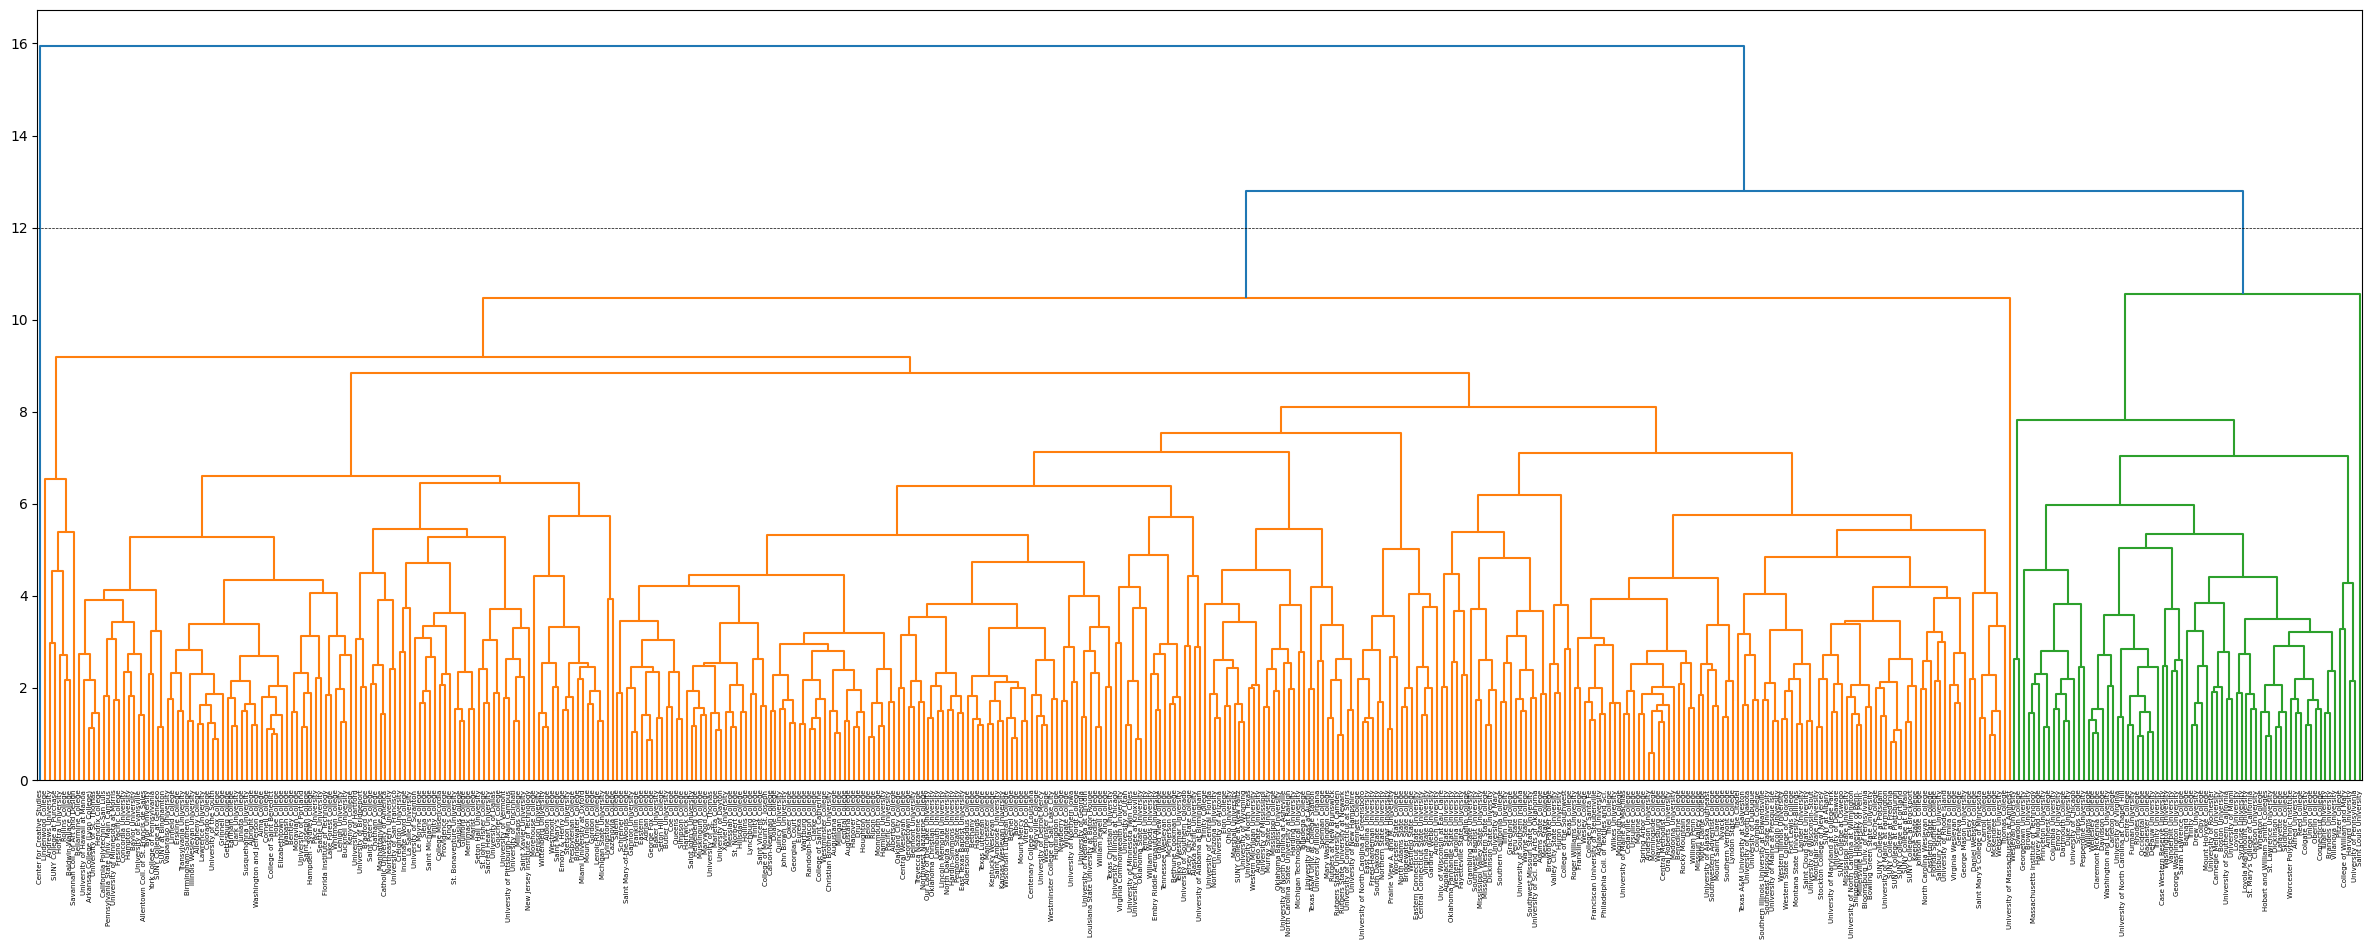

In [55]:
Z = linkage(uni_df_norm, method='complete', optimal_ordering=True)
plt.figure(figsize=(30,10))
dendrogram(Z, labels=uni_df_norm.index)
plt.axhline(y=12, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

There are three distinct color with orange, green, and the lone blue on the left.

## Cluster Characterization

In [86]:
memb = fcluster(Z, t=3, criterion='maxclust')
uni_df["Cluster"] = memb
uni_df_groups = uni_df.groupby("Cluster")

/tmp/ipykernel_52384/136780486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_df["Cluster"] = memb


In [95]:
uni_df_groups.get_group(1).describe().loc[["mean", "50%"]][cont_list]

,% new stud. from top 10%,% new stud. from top 25%,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
mean,22.781955,50.724311,9401.293233,2065.66416,2013.015038,374.766917,535.240602,1349.879699,70.310777,14.723308,62.273183
50%,21.000000,51.000000,9150.000000,1975.00000,2000.000000,273.000000,500.000000,1200.000000,73.000000,14.100000,63.000000


In [96]:
uni_df_groups.get_group(2).describe().loc[["mean", "50%"]][cont_list]

,% new stud. from top 10%,% new stud. from top 25%,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
mean,57.788732,83.84507,17162.746479,3071.816901,2724.521127,406.43662,599.661972,1108.478873,90.408451,9.788732,84.309859
50%,56.000000,84.00000,18200.000000,3000.000000,2740.000000,325.00000,595.000000,960.000000,91.000000,10.300000,84.000000


In [97]:
uni_df_groups.get_group(3).describe().loc[["mean", "50%"]][cont_list]

,% new stud. from top 10%,% new stud. from top 25%,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
mean,1.0,20.0,11230.0,3843.0,2800.0,130.0,2340.0,620.0,8.0,6.8,47.0
50%,1.0,20.0,11230.0,3843.0,2800.0,130.0,2340.0,620.0,8.0,6.8,47.0


Group 1: More Open  
Group 2: More Restrictive  
Group 3: 47% Graduation Rate  

## Categorical Analysis

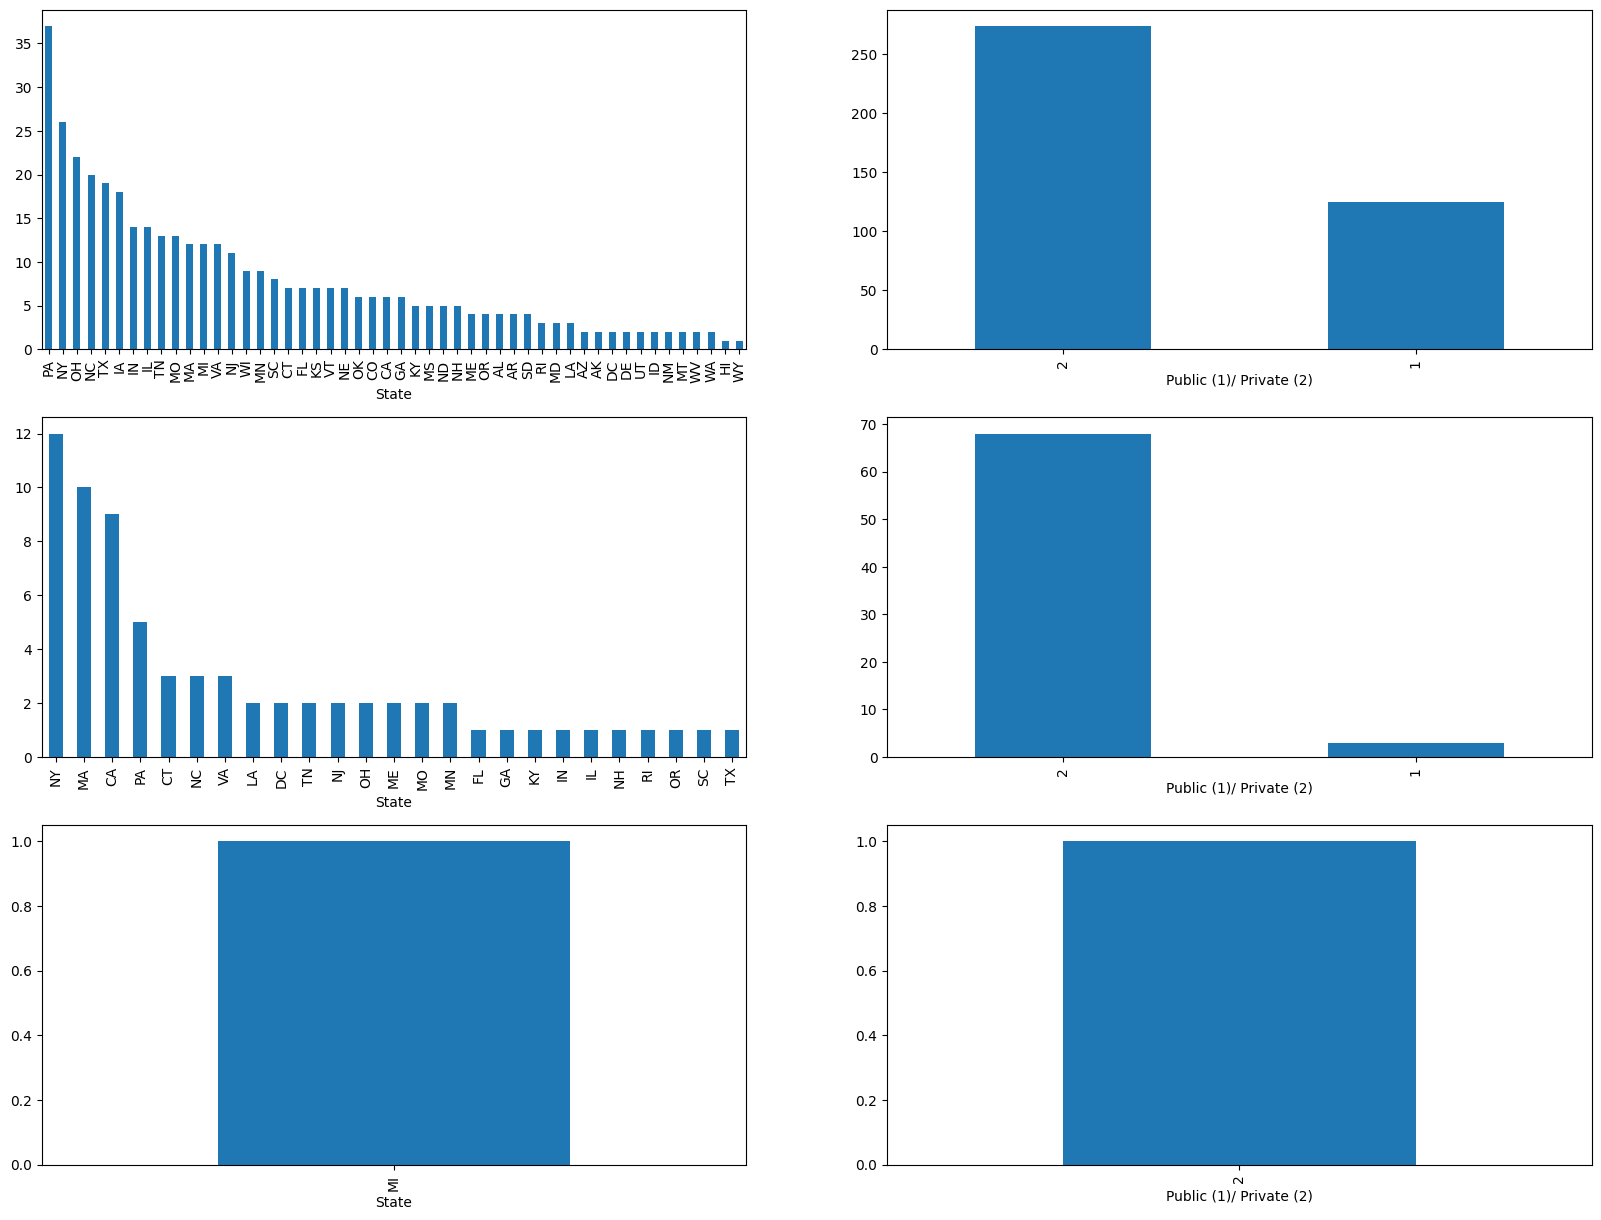

In [100]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(20,15) )
cat_list = df.columns.values[0:2]
axes= axes.flatten()
current_ax = 0;

for i in range(1,4):
    for col in cat_list:
        counts = uni_df_groups.get_group(i)[col].value_counts()
        counts.plot(kind='bar', ax=axes[current_ax])
        current_ax+=1

plt.show()